<a href="https://colab.research.google.com/github/Stig9000/first-projects/blob/main/Appr_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans


from getpass import getpass
import sys
from sqlalchemy import create_engine
import string
import sqlalchemy
import pickle


import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [8]:
cc=pd.read_csv("/content/CC GENERAL.csv")

cc.to_pickle('credit_file.pkl')

credit = pd.read_pickle("/content/credit_file.pkl")


# New Section

In [9]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


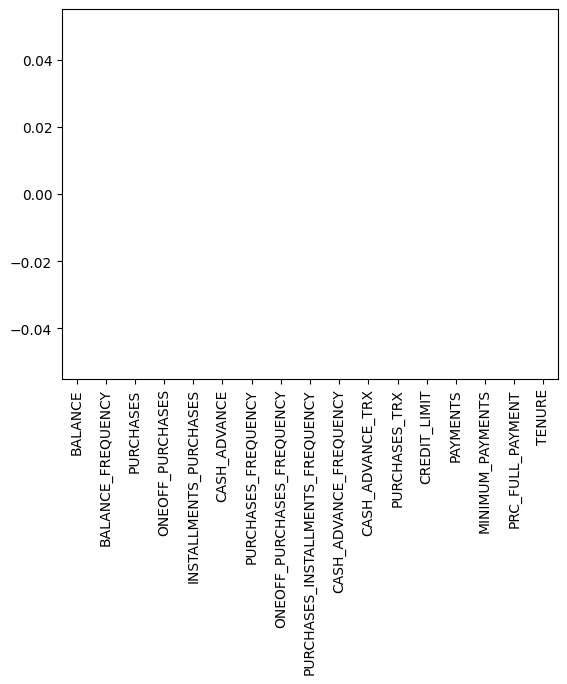

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
credit.drop(['CUST_ID'], axis = 1, inplace = True)

credit['MINIMUM_PAYMENTS']=credit['MINIMUM_PAYMENTS'].fillna(0)

credit['CREDIT_LIMIT'].fillna(0, inplace = True)

credit.isna().sum().plot(kind='bar')
plt.show()

credit



In [11]:
# prompt: Find the correlations between all the fields so I can visualise it in a heatmap

correlations = credit.corr()


In [12]:
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531324,0.322802,0.399642,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.096200,0.065008,0.140632,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356993,0.603264,0.096993,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319743,0.567292,0.051151,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256537,0.384084,0.135223,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.304009,0.453238,0.141491,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119937,0.103464,0.007943,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295099,0.243537,-0.025791,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060874,0.085551,0.033421,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132583,0.183192,0.102067,-0.249773,-0.133372


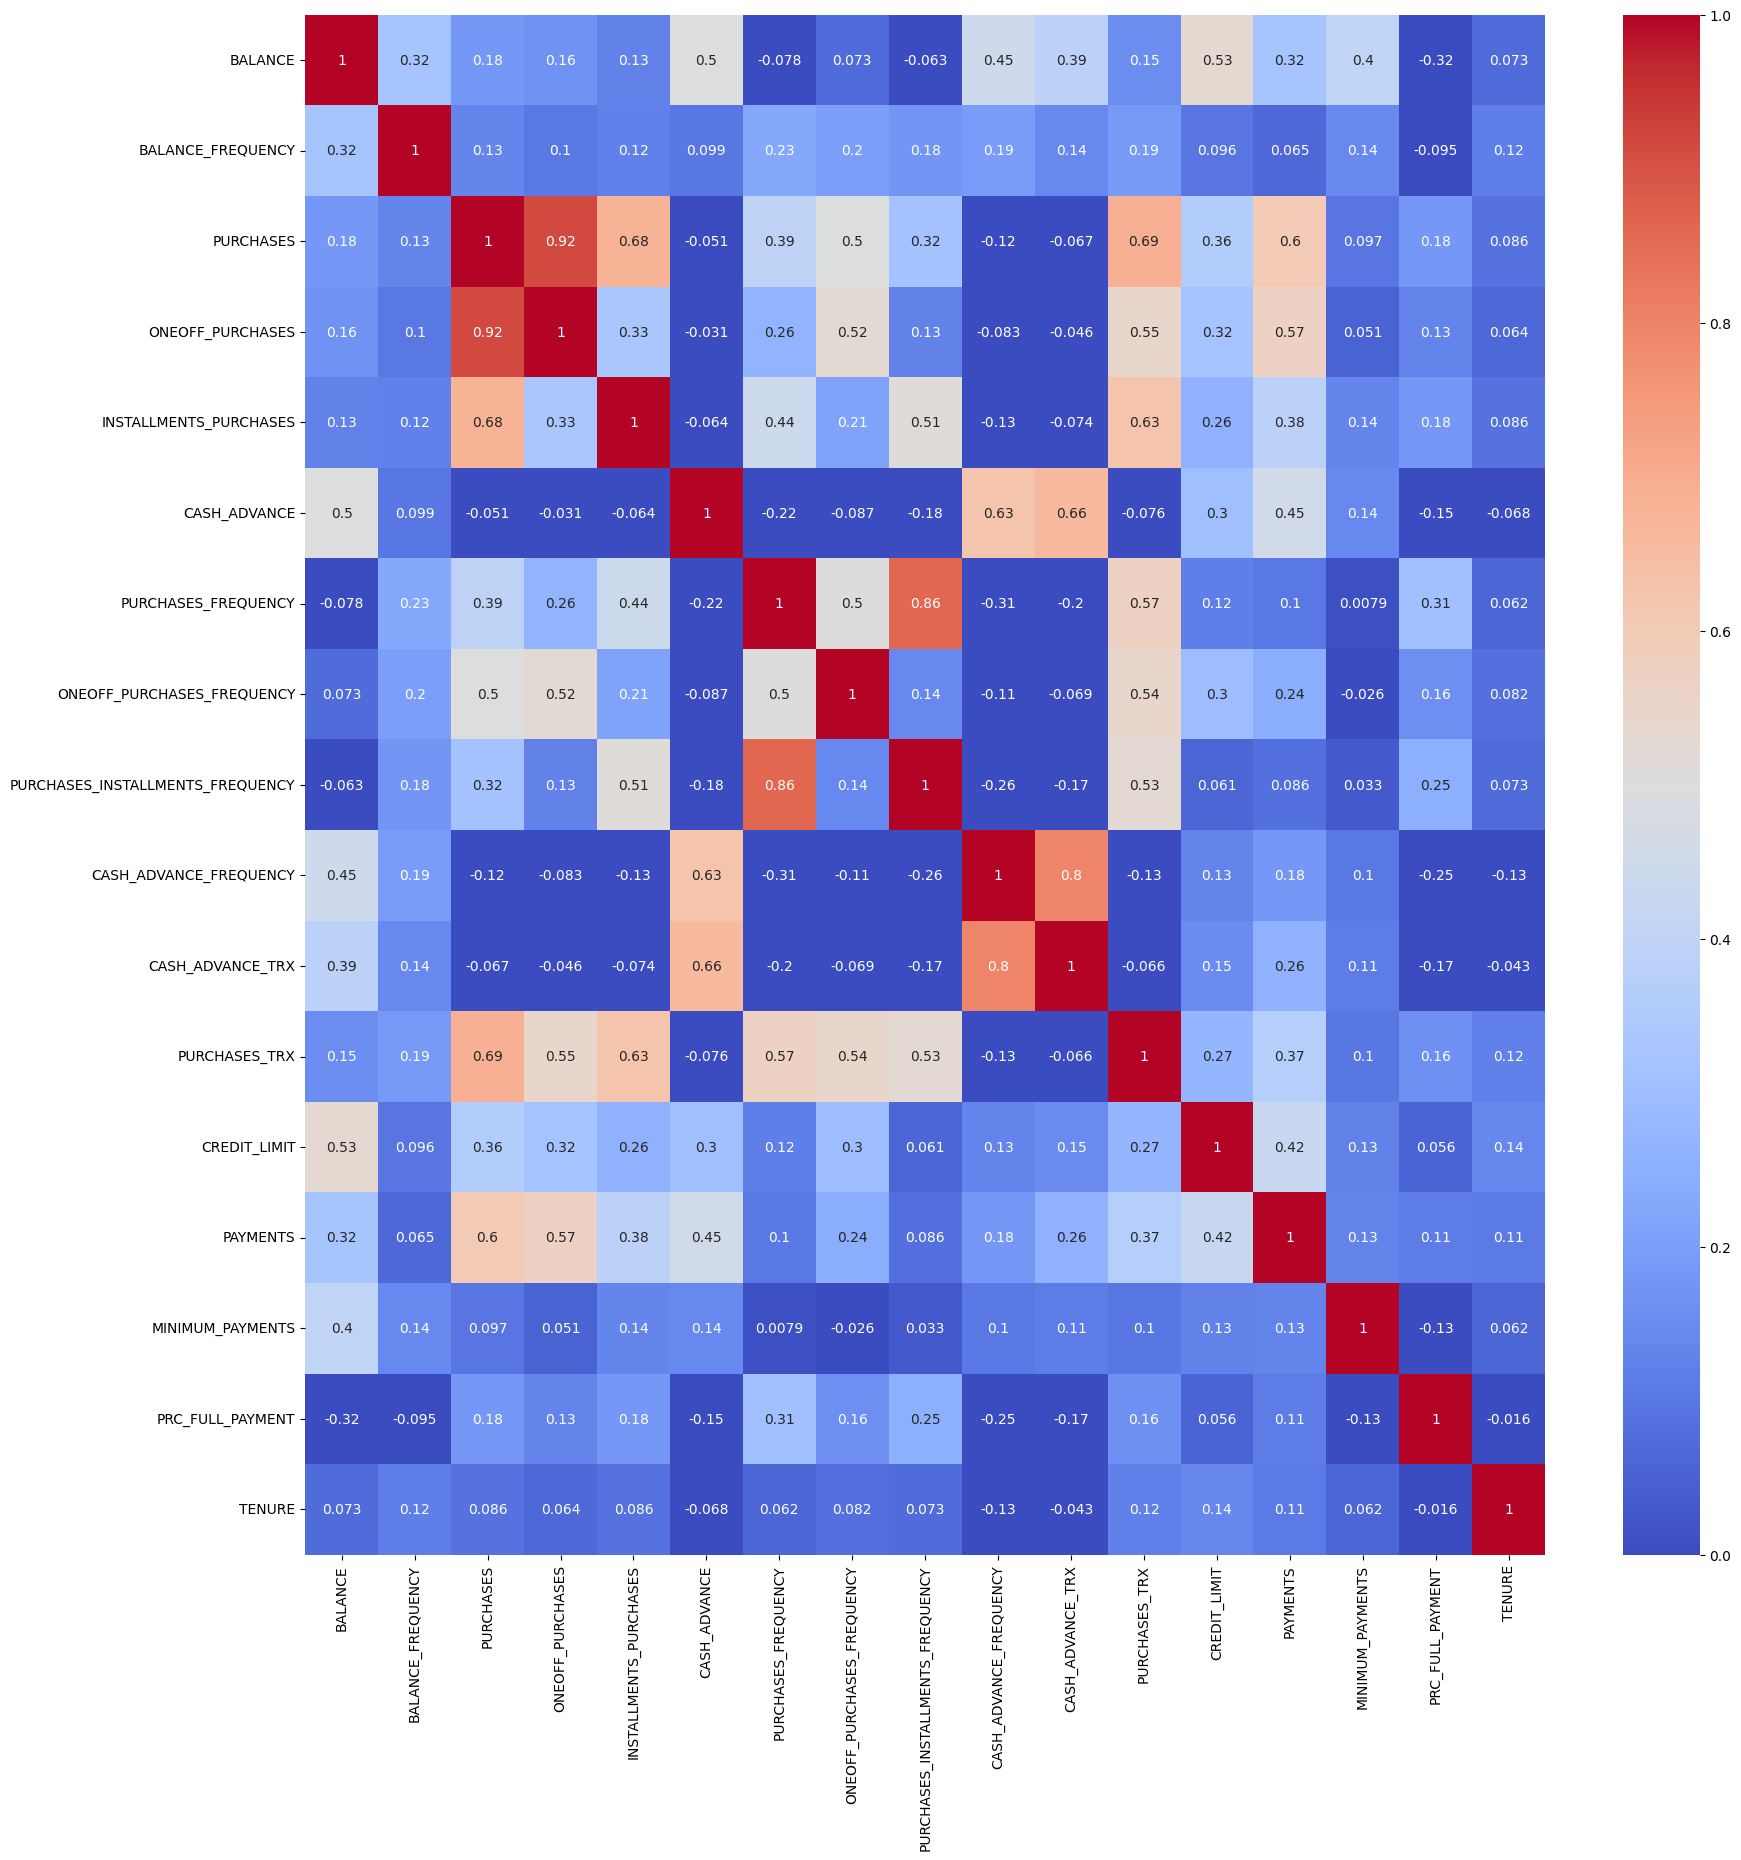

In [13]:
# prompt: using correlations, generate a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(correlations, cmap = 'coolwarm',annot=True, vmin = 0, vmax = 1, center = 0.5)
plt.show()


In [14]:
combos = set()
correlations_2 = []
for a in credit.columns:
    for b in credit.columns:
        pair, pair_reversed = (a,b), (b,a)
        if a != b and pair not in combos and pair_reversed not in combos:
            correlation = credit[a].corr(credit[b])
            correlations_2.append((f'{a} - {b}', correlation))
            combos.add((a,b))

In [15]:

"""
for a in credit.columns:
    for b in credit.columns:
        if a != b:
            correlation = credit[a].corr(credit[b])
            print(f'The correlation between {a} and {b} is : {correlation}')
 """



combos = set()
correlations_2 = []
for a in credit.columns:
    for b in credit.columns:
        pair, pair_reversed = (a,b), (b,a)
        if a != b and pair not in combos and pair_reversed not in combos:
            correlation = credit[a].corr(credit[b])
            correlations_2.append((f'{a} - {b}', correlation))
            combos.add((a,b))





"""
sns.scatterplot(x ='PURCHASES', y= 'PURCHASES_TRX', data = credit)
plt.show()

sns.lmplot(x ='CASH_ADVANCE', y= 'BALANCE', data = credit)
plt.show()
"""
'''This sorts the list of correlations by their absolute values regardless whether
the coefficient is negative or positive'''

#correlations.sort(key = lambda x: abs(x[1]), reverse = True)


correlations_2.sort(key = lambda x: abs(x[1]), reverse = True)

'''Prints out the list in a neat easily readable manner'''

#Elbow method
"""
for pair, correlation in correlation:
    print(f'Correlation between {pair}: {correlation}')
"""
for pair, correlation in correlations_2:
    print(f'Correlation between {pair}: {correlation}')


Correlation between PURCHASES - ONEOFF_PURCHASES: 0.9168445587151443
Correlation between PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY: 0.8629336372699647
Correlation between CASH_ADVANCE_FREQUENCY - CASH_ADVANCE_TRX: 0.799560757399387
Correlation between PURCHASES - PURCHASES_TRX: 0.6895608345245262
Correlation between PURCHASES - INSTALLMENTS_PURCHASES: 0.6798962203562015
Correlation between CASH_ADVANCE - CASH_ADVANCE_TRX: 0.6564975416806123
Correlation between CASH_ADVANCE - CASH_ADVANCE_FREQUENCY: 0.6285220743115787
Correlation between INSTALLMENTS_PURCHASES - PURCHASES_TRX: 0.6281075383558657
Correlation between PURCHASES - PAYMENTS: 0.6032638314010624
Correlation between PURCHASES_FREQUENCY - PURCHASES_TRX: 0.5684298289963322
Correlation between ONEOFF_PURCHASES - PAYMENTS: 0.5672916182382328
Correlation between ONEOFF_PURCHASES - PURCHASES_TRX: 0.5455232847565036
Correlation between ONEOFF_PURCHASES_FREQUENCY - PURCHASES_TRX: 0.5448693039715313
Correlation between BALA

In [16]:


##new_cc = credit.loc[:,('PURCHASES','PURCHASES_TRX')]

p_cc = credit.loc[:,('PURCHASES', 'MINIMUM_PAYMENTS')]

In [17]:
p_cc

,PURCHASES,MINIMUM_PAYMENTS
0,95.40,139.509787
1,0.00,1072.340217
2,773.17,627.284787
3,1499.00,0.000000
4,16.00,244.791237
...,...,...
8945,291.12,48.886365
8946,300.00,0.000000
8947,144.40,82.418369
8948,0.00,55.755628


1
Initialization complete
Iteration 0, inertia 97540397037.96545.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 99865126536.98984.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97538711718.66786.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 99808978607.9604.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 624201880513.521.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 93741161853.92441.
Iteration 1, inertia 89687388884.41852.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 95404408292.862.
Iteration 1, inertia 89687388884.41852

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Initialization complete
Iteration 0, inertia 71267479344.17485.
Iteration 1, inertia 61478067192.18016.
Iteration 2, inertia 61456629314.360794.
Iteration 3, inertia 61452049173.43476.
Iteration 4, inertia 61443331355.8543.
Iteration 5, inertia 61441924821.36223.
Initialization complete
Iteration 0, inertia 74486020803.4478.
Iteration 1, inertia 63162426385.863365.
Iteration 2, inertia 62139433284.046486.
Iteration 3, inertia 61963761978.75403.
Iteration 4, inertia 61920589814.894455.
Iteration 5, inertia 61836392744.356415.
3
Initialization complete
Iteration 0, inertia 50774404319.62021.
Iteration 1, inertia 41692635717.26073.
Iteration 2, inertia 41652487766.20435.
Iteration 3, inertia 41629055335.19203.
Iteration 4, inertia 41619913753.82072.
Iteration 5, inertia 41610703882.42059.
Initialization complete
Iteration 0, inertia 46829639574.90425.
Iteration 1, inertia 44662265224.970345.
Iteration 2, inertia 44233658708.99362.
Iteration 3, inertia 44113326968.03707.
Iteration 4, iner

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 34801554206.97227.
Iteration 1, inertia 32087551781.730568.
Iteration 2, inertia 31336891049.122345.
Iteration 3, inertia 31097114816.186604.
Iteration 4, inertia 30936580246.52937.
Iteration 5, inertia 30866217113.448883.
Initialization complete
Iteration 0, inertia 39993094478.203125.
Iteration 1, inertia 31545664601.53418.
Iteration 2, inertia 30810080712.078957.
Iteration 3, inertia 30771082213.909584.
Iteration 4, inertia 30762016202.179794.
Iteration 5, inertia 30749827159.894264.
Initialization complete
Iteration 0, inertia 40299379394.23053.
Iteration 1, inertia 36161670295.15967.
Iteration 2, inertia 34992022111.296455.
Iteration 3, inertia 34223666858.232956.
Iteration 4, inertia 33831937827.786907.
Iteration 5, inertia 33600859158.851467.
Initialization complete
Iteration 0, inertia 41042391597.020294.
Iteration 1, inertia 36080576484.08658.
Iteration 2, inertia 35074207567.88519.
Iteration 3, inertia 34582987832.93557.
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 26512949031.36357.
Iteration 1, inertia 19690081192.242256.
Iteration 2, inertia 18371691843.91259.
Iteration 3, inertia 18143828992.978195.
Iteration 4, inertia 18111209899.834606.
Iteration 5, inertia 18097196579.10698.
Initialization complete
Iteration 0, inertia 24104836039.63826.
Iteration 1, inertia 21713941263.98899.
Iteration 2, inertia 21152510057.312126.
Iteration 3, inertia 20815600828.666527.
Iteration 4, inertia 20611988503.567493.
Iteration 5, inertia 20414319652.73994.
Initialization complete
Iteration 0, inertia 24946334273.12898.
Iteration 1, inertia 19872705793.254066.
Iteration 2, inertia 18417033572.37656.
Iteration 3, inertia 18202158028.972652.
Iteration 4, inertia 18158971603.49559.
Iteration 5, inertia 18130443854.005352.
Initialization complete
Iteration 0, inertia 24889567133.752518.
Iteration 1, inertia 19205914880.122578.
Iteration 2, inertia 18422871899.032326.
Iteration 3, inertia 18226165419.482677.
Iteration 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 21310305609.619656.
Iteration 1, inertia 15825060000.541965.
Iteration 2, inertia 14510078299.301243.
Iteration 3, inertia 14322866884.618021.
Iteration 4, inertia 14219795923.223621.
Iteration 5, inertia 14173066961.687525.
Initialization complete
Iteration 0, inertia 19584802875.71469.
Iteration 1, inertia 14731332828.970018.
Iteration 2, inertia 14389208981.154621.
Iteration 3, inertia 14313420162.74402.
Iteration 4, inertia 14241483082.077124.
Iteration 5, inertia 14187450034.977718.
Initialization complete
Iteration 0, inertia 18683991143.200195.
Iteration 1, inertia 15568244746.571249.
Iteration 2, inertia 15122225476.224882.
Iteration 3, inertia 15013064559.745224.
Iteration 4, inertia 14940018964.842747.
Iteration 5, inertia 14928933626.483337.
Initialization complete
Iteration 0, inertia 24293541151.864357.
Iteration 1, inertia 20050456280.5433.
Iteration 2, inertia 18343111768.970913.
Iteration 3, inertia 17197349512.578026.
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 14291167139.9795.
Iteration 1, inertia 12735760480.743834.
Iteration 2, inertia 12672581663.908205.
Iteration 3, inertia 12613300925.095194.
Iteration 4, inertia 12551034621.233875.
Iteration 5, inertia 12482341627.353502.
Initialization complete
Iteration 0, inertia 14756238051.844965.
Iteration 1, inertia 11154464175.671736.
Iteration 2, inertia 10844160220.022253.
Iteration 3, inertia 10806056961.002756.
Iteration 4, inertia 10799345654.181808.
Iteration 5, inertia 10797095955.72327.


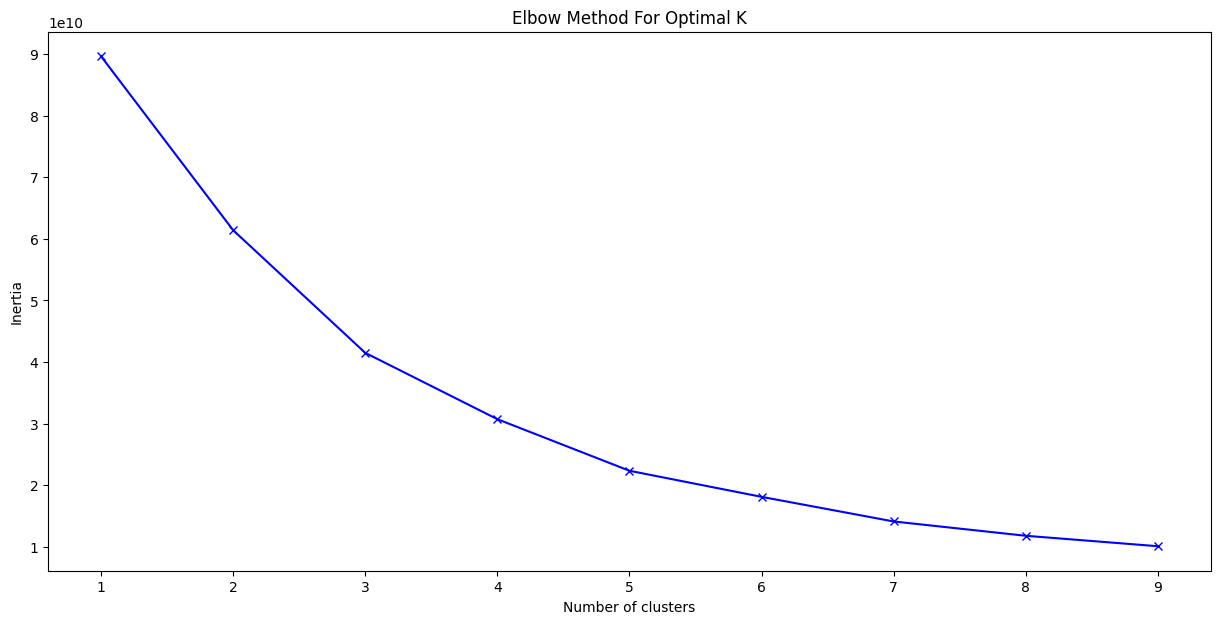

Initialization complete
Iteration 0, inertia 82869120574.92288.
Iteration 1, inertia 70436396832.04997.
Iteration 2, inertia 62950692272.55498.
Iteration 3, inertia 57437592789.86807.
Iteration 4, inertia 53196863936.008736.
Iteration 5, inertia 49826082001.40686.
Initialization complete
Iteration 0, inertia 84475824589.63809.
Iteration 1, inertia 69541427335.54958.
Iteration 2, inertia 60588824580.77318.
Iteration 3, inertia 53921697895.05042.
Iteration 4, inertia 47758073396.24691.
Iteration 5, inertia 41974358689.254585.
Initialization complete
Iteration 0, inertia 68791260698.05894.
Iteration 1, inertia 58404746449.86665.
Iteration 2, inertia 51470181408.82795.
Iteration 3, inertia 44589062766.78895.
Iteration 4, inertia 39904667973.754944.
Iteration 5, inertia 37830753481.92794.
Initialization complete
Iteration 0, inertia 75353320187.21066.
Iteration 1, inertia 62050120157.76792.
Iteration 2, inertia 55216305552.86159.
Iteration 3, inertia 49794288608.8475.
Iteration 4, inertia 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:

cost = []
for num_clusters in range(1,10):
    print(num_clusters)
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter= 6, verbose = 1)
    kmeans.fit(p_cc)
    cost.append(kmeans.inertia_)


plt.figure(figsize=(15,7))
plt.plot(range(1,10),cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


#creating clusters

kmeans = KMeans(n_clusters = 4 , init = 'random', max_iter= 6, verbose = 1)
clusters = kmeans.fit_predict(p_cc)



kmeans2 = KMeans(n_clusters = 3 , init = 'random', max_iter= 6, verbose = 1)
clusters2 = kmeans2.fit_predict(p_cc)


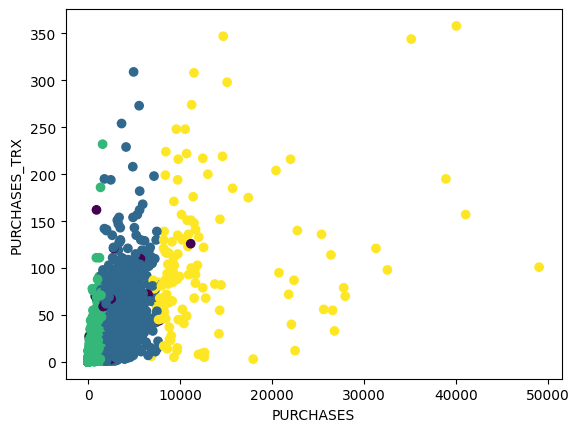

In [19]:
plt.scatter(credit['PURCHASES'], credit['PURCHASES_TRX'], c = clusters, cmap= 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_TRX')
plt.show()




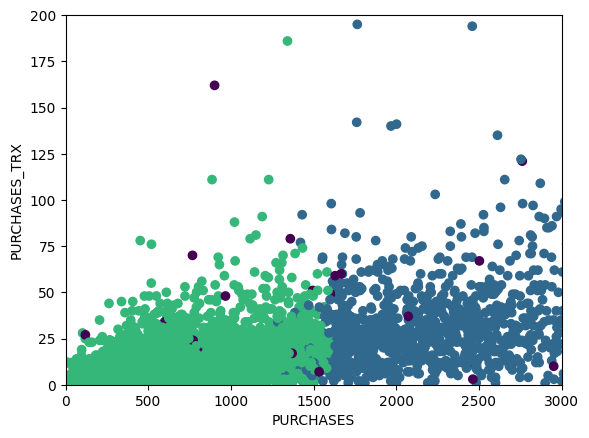

In [20]:
plt.scatter(credit['PURCHASES'], credit['PURCHASES_TRX'], c = clusters, cmap= 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_TRX')
plt.xlim(0, 3000)  # Adjust the values based on your data
plt.ylim(0, 200)    # Adjust the values based on your data
plt.show()

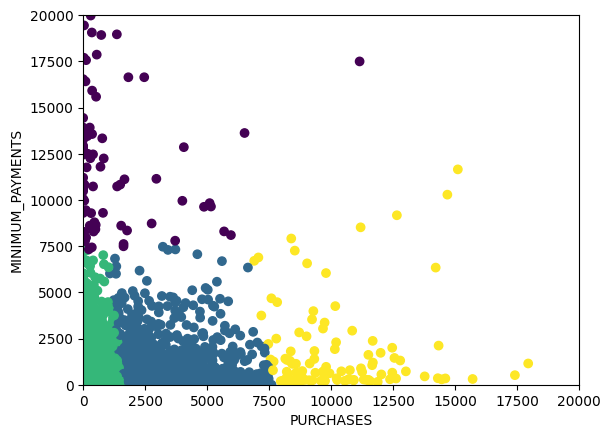

In [21]:
 plt.scatter(credit['PURCHASES'], credit['MINIMUM_PAYMENTS'], c = clusters, cmap= 'viridis', )
plt.xlabel('PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.xlim(0, 20000)  # Adjust the values based on your data
plt.ylim(0, 20000)
plt.show()




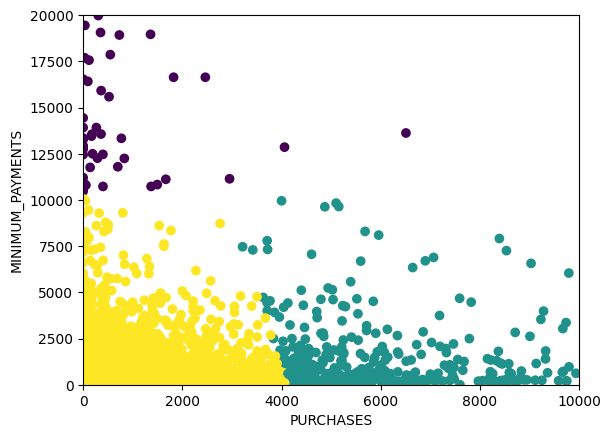

In [23]:
 plt.scatter(credit['PURCHASES'], credit['MINIMUM_PAYMENTS'], c = clusters2, cmap= 'viridis', )
plt.xlabel('PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.xlim(0, 10000)  # Adjust the values based on your data
plt.ylim(0, 20000)
plt.show()

